# This notebook describes the proces of exploring and manipulating the data

For review purpose, there is an option to run or not run specific lines of code. Use run_all to run all script.<br>
*To review all 'correct' output of this notebook, 'run_all' should be True. Then rerun all code via 'Kernel>Restart Kernel and Run All Code'.*

In [1]:
run_all = True

__Note to teachers: after completing a first 'build' and 'run' for this project, I though of another way of designing the model. Namely, to create a new variable 'dif_lifespan' which is the difference between genetic and lifespan. This variable is used to calculate the relative effects of lifestyle (exercise, smokingk, alcohol and sugar) on lifespan. I did not adjust the discriptions in this notebook for this 'new model', however I will do the same steps for this new model as I did for the old one. There where I added new code for this model, I add the parameter "new = True".__

**Imports**

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

**Load db into DataFrame**

In [3]:
df = pd.read_csv("../dload_db/csv/db_mcr.csv")

**Predefine plots (histogram, Q-Q plot, correlation/simple regression)**

In [4]:
def hist(shape, df):
    rows, cols = shape
    fig, ax = plt.subplots(rows, cols, constrained_layout = True)
    # Set width
    fig.set_figheight(2 * rows)
    fig.set_figwidth(2.5 * cols)

    # Subplots
    subplot = 0
    for row in range(rows):
        for col in range(cols):
            try:
                df.iloc[:, subplot]
            except:
                pass
            else:
                # Set bins
                bin_min = math.floor(df.iloc[:, subplot].min())
                bin_max = math.ceil(df.iloc[:, subplot].max()) + 1
                bins = range(bin_min, bin_max)
                # Load subplot
                ax[row, col].hist(x=df.iloc[:, subplot], bins=bins, rwidth=0.75) 
                ax[row, col].set(ylabel="Count", title=f"Histogram of \n{df.columns[subplot]}")
                # Next subplot
                subplot += 1
            
    # Show (all) figures
    plt.show()
    
def qqplot(shape, df):
    rows, cols = shape
    fig, ax = plt.subplots(rows, cols, constrained_layout = True)
    # Set width
    fig.set_figheight(2 * rows)
    fig.set_figwidth(2.5 * cols)

    # Subplots
    subplot = 0
    for row in range(rows):
        for col in range(cols):
            try:
                df.iloc[:, subplot]
            except:
                pass
            else:
                # Load subplot
                sm.qqplot(df.iloc[:, subplot], line='s', ax = ax[row, col], markersize=0.5)
                ax[row, col].set(title=f"Q-Q plot of \n{df.columns[subplot]}")
                # Next subplot
                subplot += 1
            
    # Show (all) figures
    plt.show()

def pairplot(shape, df, depend_var):
    rows, cols = shape
    fig, ax = plt.subplots(rows, cols, constrained_layout = True)
    # Set width
    fig.set_figheight(2 * rows)
    fig.set_figwidth(2.5 * cols)

    # Subplots
    subplot = 0
    for row in range(rows):
        for col in range(cols):
            try:
                df.iloc[:, subplot]
            except:
                pass
            else:
                # Load subplot
                # Use numpy polyfit with 1 degree to quickly fit linear regressionline
                print(depend_var)
                b1, b0 = np.polyfit(df.iloc[:, subplot], df[depend_var], 1)
                plt.text(55, 105, f"slope = {round(b1, 2)}", fontsize = 10)
                plt.scatter(df.iloc[:, subplot], df[depend_var])
                plt.plot(df.iloc[:, subplot], b0+b1*df.iloc[:, subplot], color='red')
                plt.title(f"Plot of {variable} against {depend_var}")
    
    # Show (all) figures
    plt.show()

## Exploring and transforming the data
This database represents subjects (persons) with a certain lifestyle and projected lifespan. Ultimately, this data is used to predict lifespan based on the other variables.

First, we answer some basic questions in order to prepare the data for exploration. E.g. what kind of data are we working with, do we understand the variabels (columns), is the data making sense for each variable, are we missing data etc. From there, we start exploring the data deeper.

### Preparing the database
Our first look at the data.

In [5]:
run = False

if run or run_all:
    # Headers (variables), dtypes and shape
    print("Headers (variables):", [variable for variable in df.columns])
    print("Datatypes:", [dtype for dtype in df.dtypes])
    print("Rows: ", df.shape[0], "; Cols: ", df.shape[1], sep="")
    print("") # Create enter after information
    
    # Same can be done via .info()
    print(df.info())
    print("") # Create enter after information

    # Display head()
    display(df.head())

Headers (variables): ['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar', 'lifespan']
Datatypes: [dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]
Rows: 4096; Cols: 8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4095 non-null   float64
 1   length    4093 non-null   float64
 2   mass      4094 non-null   float64
 3   exercise  4095 non-null   float64
 4   smoking   4096 non-null   float64
 5   alcohol   4094 non-null   float64
 6   sugar     4095 non-null   float64
 7   lifespan  4094 non-null   float64
dtypes: float64(8)
memory usage: 256.1 KB
None



,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0


**Interpretation**<br>
Firstly we see that there are 8 variables. Of these 1 is a dependent variable (lifespan) and 7 are independent variables. 

These variables are describes as:<br>
*NOTE: the order and names of these variables might change in 'chapter: Some further processing'*<br>
***genetic:** the expected lifespan in years based genetic factors, independent on lifestyle<br>
**lenght:** lenght in cm<br>
**mass:** weight (mass) in kg<br>
**exercise:** (average) daily hours of exercise<br>
**smoking:** (average) daily number of sigarettes<br>
**alcohol:** (average) daily number of glasses alcohol<br>
**suger:** (average) daily cubes of sugar (4 gramms)<br>
**lifespan (dependant variable):** projected lifespan in years, dependent on lifestyle<br>*

Based on the descriptions, we can deduce that all variables are numbers, mostly floats but also possibly ints (lenght?). All variables should be positive numbers and depending on the variable have a certain logical range. 

We see in '.info()' that some variables have dtype 'object' which is equivalent to 'string'. We need to find out why and whether we need to manipulate the data. Also, we see that there are no 'Null' or empty datapoints from comparing the index (shape) with the non-null count. However, there might be datapoints that have other annotations to indicate data is missing (e.g. "NaN") or other non-numerical data.

#### Check for non numerical data
Start with listing all indices that have non numerical data. Respecify the dtype as either int() or float(). For all non-complient data, list the (unique) indices (in a set) and decide what to do with them.

In [6]:
run = False

if run or run_all:
    # List indices of all non numerical entries
    list_non_num = []
    for variable in df.columns:
        # Try to change all values to numeric, for cases this does not work, enter 'Null'. Cast in list.
        list_non_num = list_non_num + df.index[~pd.to_numeric(df[variable], errors="coerce").notnull()].tolist()

    set_non_num = set(list_non_num)
    print("There are ", len(set_non_num), " instances with missing data: ", set_non_num, sep="")

    # Remove incomplete/missing data from dataset
    df = df.loc[~df.index.isin(set_non_num)]

    # Then we convert the object-type variables to numeric and check.
    for variable in df.columns:
        df[variable] = pd.to_numeric(df[variable])
    print("Datatypes:", [dtype for dtype in df.dtypes])

There are 12 instances with missing data: {2721, 3043, 1861, 3398, 2793, 1038, 2576, 2354, 947, 889, 4027, 2300}
Datatypes: [dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


**Interpretation**<br>
There are 10 instances (rows) with non-numerical data. In the code above, (for now) I have decided to exclude them from the dataset, as they account for <0,25% of the data. Possibly in later stages I might want to use a different way to handle these exeptions, if the model requires so.

*Note: if the output indicates that "there are 0 instances with missing data", this might be due to running an already 'cleaned' version of df.*

#### Check for illogical data
For each variable I decide by 'common sense' and looking at the data what the range should be in which the data is 'makes sense', or in other words is 'logical'. We start with looking at the histograms to get an impression of the distribution, min/max values etc. In addition to the histograms, we take a look at the Q-Q plots to assess the distribution of data. 

For all data that does not comply to the logical range, list the (unique) indices (in a set) and decide what to do with them.

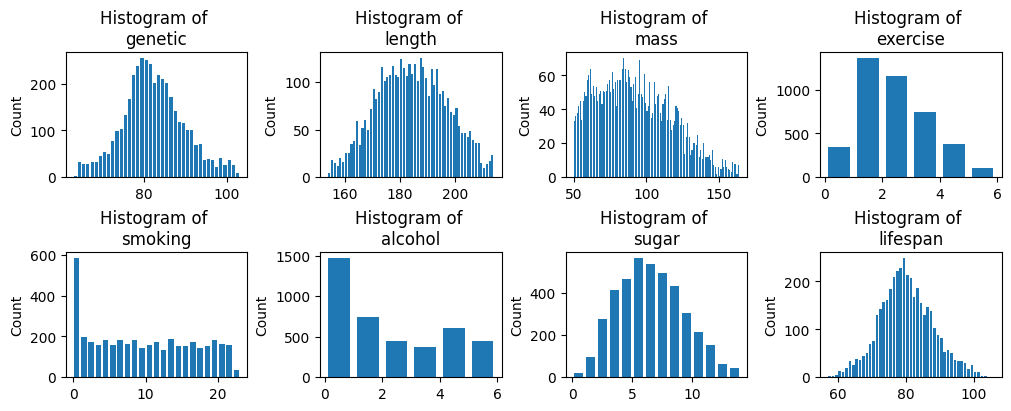

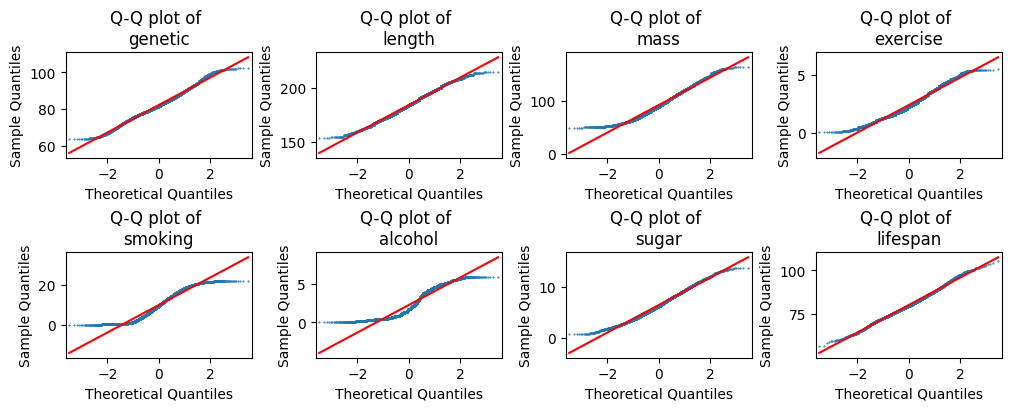

In [7]:
# To increase readability of code, you can turn on/off running the script
run = False
if run or run_all:
    cols = 4
    shape = (math.ceil(len(df.columns) / cols), cols)
    hist(shape, df)
    qqplot(shape, df)

**Interpretation**<br>
Firstly, we look at all the histograms without furter manipulating/transforming the data. I have chosen to use integer-bins, as to make the histograms beter interpretable (however I keep in mind that most of the data are floats). There are some histograms that raise some questions/remarks and some (one, namely 'lifespan') histograms that (seems to) show incorrect data. 

Questions:
* A large part of the subjects are (very) tall (height > 200)
* Peek of count at max height (height = 214)
* A large part of the subjects are (very) heavy (mass > 100)
* There seems to be a dropoff in mass at lower boundry (mass < 50) 
* There seems to be a dropoff in daily sigarette use (smoking > 21)
* There seems to be a dropoff in daily alcohol consumption (alcohol > 6)
* There seems to be a dropoff in daily hours of exercise (exercise > 6), however this one is less 'abrupt' than mass, sigarette use and alcohol

There seem to be some (arbitrary) cutoff points, which indicates that this dataset is sampled on a specific subgroup of the population. Without more information, I am not able to explicit what the specific subgroup is, however this 'bias' of the dataset will have an effect on the model. This bias should be mentioned to the enduser.

After inspecting the histograms and Q-Q plots, we see that (only) the data of 'lifespan' should be manipulated at this point. However, I decided to set some more general 'logical ranges' for the variables, so the code could also handle other (new) data with unexpected 'illogical' values.

In [8]:
# To increase readability of code, you can turn on/off running the script
run = False    
if run or run_all:
    # Define range that the data 'logically' can in a dictionary
    range_var = {
        'genetic': (40, 120),
        'length': (147, 220),
        'mass': (30, 200),
        'exercise': (0, 8),
        'smoking': (0, 60),
        'alcohol': (0, 12),
        'sugar': (0, 50),
        'lifespan': (40, 120)
    }

    # List data that does not comply with range
    list_illogical = []
    for variable in df.columns:
        # Load range of variable in range_var
        range_min = range_var[variable][0]; range_max = range_var[variable][1]
        list_illogical = list_illogical + df.index[(df[variable] < range_min) | (df[variable] > range_max)].tolist()

    set_illogical = set(list_illogical)
    print("There are ", len(set_illogical), " instances with data outside of the given boundries: ", set_illogical, sep="")

    # Remove incomplete/missing data from dataset
    df = df.loc[~df.index.isin(set_illogical)]

There are 0 instances with data outside of the given boundries: set()


**Interpretation**<br>
*For the sake of this 'job', I quite subjectively 'guessed' appropriate ranges based on a quick Google-search. E.g. what is the oldest living person, what is the minimal/maximum height of 'regular' persons (implying this model will not fit people with other conditions), how much sugar can a person eat daily or how many sigarettes can a person smoke, etc. To check if my assumptions are somewhat reasonable, I compared them to the data in this database and concluded that my assumptions can be used in this case.*

Based on the logical ranges, there are 2 instances that do not fit these boundries, which is <0.0005% of the dataset. They are (for now) excluded from the further analysis. 

**There are different improvements to be made:**
* The reasoning behind the chosen acceptable data-value ranges could be better/more specific. For the sake of time I choose not to do this.

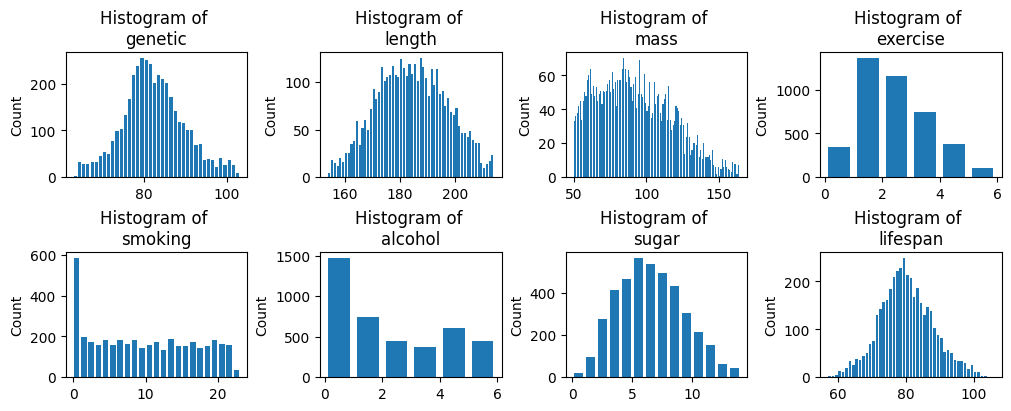

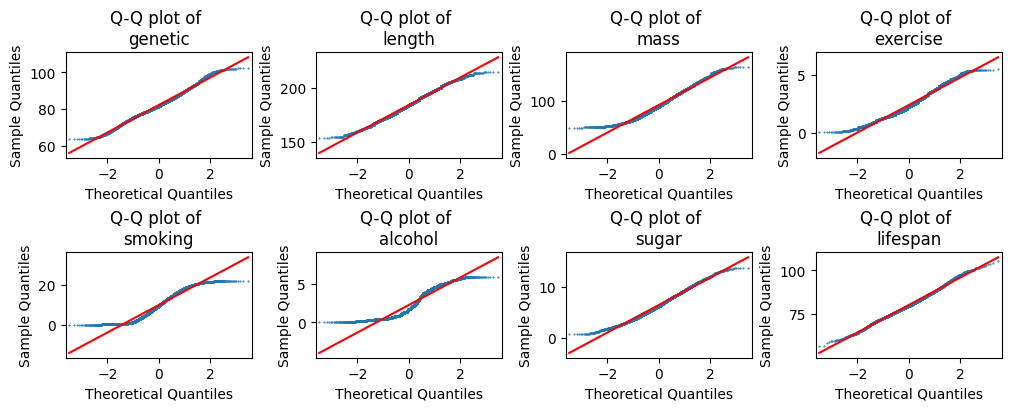

In [9]:
# To increase readability of code, you can turn on/off running the script
run = False
if run or run_all:    
    # Histogram of data after cleaning/transforming
    cols = 4
    shape = (math.ceil(len(df.columns) / cols), cols)
    hist(shape, df)
    qqplot(shape, df)

**Interpretation**<br>
After cleaning/transforming the data, we can take another look at the histograms and Q-Q plots. This concludes the first part of preparing the dataset for EDA. Now we can start the 'real' exploratory data analysis. 

#### Check for duplicates
Finally, we check for duplicates. If there are any, list the (unique) indices (in a set) and decide what to do with them.

In [10]:
# To increase readability of code, you can turn on/off running the script
run = False

if run or run_all:
    # Check for and remove duplicates
    df = df[~df.duplicated()]
    print(f"There are {df[df.duplicated()].shape[0]} duplicates removed from the dataset")

There are 0 duplicates removed from the dataset


**Interpretation**<br>
There are no duplicates in this dataset. However, if there would be, it is seems 'too coincidal' to be real and I would choose to remove the duplicate. However, this choice ios subjective and can be debated. 

#### Some further preprocessing and transformation
These next steps I would ideally have done earlier. However, due to the data not being numerical, this step had to wait a bit. We ask the following questions: are all column names (variable names) making sense? Do they have logical measures (cubes of sugar...)? Which (combination of) variables makes sense to add to the dataset?

In [11]:
# To increase readability of code, you can turn on/off running the script
run = False
if run or run_all:
    # Rename variables if desired
    variable_names = ['genetic', 
                      'length', 
                      'mass', 
                      'exercise', 
                      'smoking', 
                      'alcohol', 
                      'sugar', 
                      'lifespan']
    if len(df.columns) == len(variable_names):
        df.columns = variable_names
        print(f"{len(df.columns)} variables renamed.")
    else:
        print(f"Cannot rename variables: {len(df.columns)} variables are trying to be renamed from a list of {len(variable_names)} names")
    
    # Rearrange columns, to put dependent variable ('lifespan') in front
    df_cols = df.columns.tolist()
    df_cols = df_cols[-1:] + df_cols[:-1]
    df = df[df_cols]

    # Transform columns if necessary
    df['sugar'] = df['sugar'] * 4 # Unit of measurement for sugar from cubes (4 gramm) to gramms
    
    # Add new (combinations of) variables, either rational or dummy's
    # BMI and dummies
    df['bmi'] = df['mass'] / ((df['length'] / 100)**2) # BMI as combined variable of mass and length
    bmi_cat = (0, 18.5, 25, 30, 40) # Healthy upper and lower bounds of BMI
    
    df.loc[df['bmi'] <= bmi_cat[1], 'bmi norm under'] = df['bmi'] - bmi_cat[1] # Normalised BMI for subjects under healthy levels
    df.loc[df['bmi'] > bmi_cat[1], 'bmi norm under'] = 0 
    df.loc[df['bmi'] >= bmi_cat[2], 'bmi norm over'] = df['bmi'] - bmi_cat[2] # Normalised BMI for subjects over healthy levels
    df.loc[df['bmi'] < bmi_cat[2], 'bmi norm over'] = 0
    
    df['bmi under'] = df['bmi'].between(bmi_cat[0], bmi_cat[1], 'right') # Dummy of underweight subjects
    df['bmi over'] = df['bmi'].between(bmi_cat[1], bmi_cat[2], 'right') # Dummy of overweight subjects
    df['bmi obese'] = df['bmi'].between(bmi_cat[2], bmi_cat[3], 'right') # Dummy of obese subjects subjects
    df['bmi morbid'] = df['bmi'] > bmi_cat[3] # Dummy of morbidly obese subjects
    
    # Smoking dummies
    smoking_cat = (0, 5, 10, 15, 20)
    df['smoking few'] = df['smoking'].between(smoking_cat[0], smoking_cat[1], 'right') # Smoking few (1-5) sigarettes as dummy
    df['smoking some'] = df['smoking'].between(smoking_cat[1], smoking_cat[2], 'right') # Smoking some (6-10) sigarettes as dummy
    df['smoking more'] = df['smoking'].between(smoking_cat[2], smoking_cat[3], 'right') # Smoking more (11-15) sigarettes as dummy
    df['smoking alot'] = df['smoking'].between(smoking_cat[3], smoking_cat[4], 'right') # Smoking alot (16-20) sigarettes as dummy
    df['smoking most'] = df['smoking'] > smoking_cat[4] # Smoking most (20+) sigarettes as dummy

# This piece of code is added to create a 'line' of new models, see comments on top of this notebook 
new = True
if new:
    # Create and rename new variable 'dif_lifespan' as difference between genetic and lifespan 
    df['lifespan'] = df['genetic'] - df['lifespan']
    df.columns = ['dif_lifespan', *df.columns[1:]]
    # Drop genetic as it is no longer used
    df.drop(columns='genetic')
        
    
# Check new columns
display(df.head())

8 variables renamed.


,dif_lifespan,genetic,length,mass,exercise,smoking,alcohol,sugar,bmi,bmi norm under,bmi norm over,bmi under,bmi over,bmi obese,bmi morbid,smoking few,smoking some,smoking more,smoking alot,smoking most
0,0.8,73.9,185.0,99.7,0.9,0.0,2.4,27.6,29.130752,0.0,4.130752,False,False,True,False,False,False,False,False,False
1,1.0,86.0,172.0,105.4,1.8,8.1,0.4,16.8,35.627366,0.0,10.627366,False,False,False,True,False,True,False,False,False
2,1.7,83.3,176.0,111.4,1.1,0.8,4.6,30.0,35.963326,0.0,10.963326,False,False,False,True,True,False,False,False,False
3,1.8,82.8,164.0,111.4,4.7,11.8,1.0,11.6,41.418798,0.0,16.418798,False,False,False,True,False,False,True,False,False
4,3.7,78.7,178.0,71.6,1.5,8.3,4.9,22.0,22.598157,0.0,0.000000,False,True,False,False,False,True,False,False,False


**Interpretation**<br>
By rearranging the dependent variable to the first column, I make sure the variable can be easily found in further EDA, even when adding, dropping or renaming variables. I decided not to rename the variables, as I am quite familiar with the dataset now and do not want to 'throw myself off'. If desirable, you could rename the variables withouth any consequences to the rest of the code.

For sugar I decided to transform the data to gramms instead of cubes. I assumed that one cube would be 4 gramms of sugar. Furthermore I added two variables, 'bmi' (mass divided by squared length) and smoking more than 20 sigarettes. The former since I expect length and mass the interact with eachother, as longer people are generally more heavier. The latter since I suspect that smoking at least one pack a day might be an underestimation of some people and result in smoking a little more sometimes.

### Exploratory Data Analysis: Looking at values, descriptives, correlations, ...
In this part we start looking at values of variables, their mean, variance and standart deviation, the interaction and correlation with other variables, etc.

,dif_lifespan,genetic,length,mass,exercise,smoking,alcohol,sugar,bmi,bmi norm under,bmi norm over
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,2.100930,82.278624,183.885162,92.275930,2.403477,9.809035,2.266846,25.948678,27.682015,-0.343889,4.883477
std,2.452995,7.441333,12.622858,25.801031,1.170426,6.918614,1.801044,10.834487,8.711661,1.027919,6.593077
min,-5.500000,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,2.800000,11.320500,-7.179500,0.000000
25%,0.400000,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,17.600000,20.938542,0.000000,0.000000
50%,1.900000,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,25.200000,26.476726,0.000000,1.476726
75%,3.700000,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,33.600000,33.207260,0.000000,8.207260
max,14.700000,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,55.200000,65.869494,0.000000,40.869494


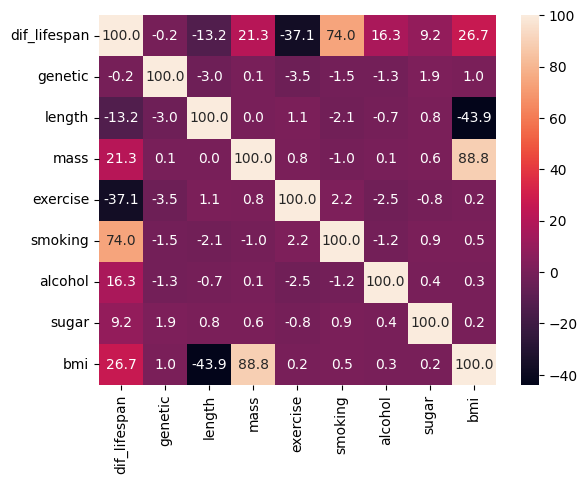

In [12]:
# To increase readability of code, you can turn on/off running the script
run = True
if run or run_all:
    # Descriptives
    # display(df.describe(include='all'))
    display(df.describe()) # Descriptives of numerical only

    # Correlation (pearson only or pearson and spearman)
    corr_type = [['pearson'], ['pearson', 'spearman']]

    for corr in corr_type[0]:
        # Correlation
        corr = df.iloc[:, :9].corr(corr)
        sns.heatmap(corr * 100, annot=True, fmt=".1f", xticklabels=corr.columns, yticklabels=corr.columns)

**Interpretation**<br>
Pearson correlation checks on linearity: do values 'change together'. Spearman does the same, buth looks not at the values but at the ranks of the values. We do not get more information by using both Pearson and Spearman. For 'simplicity' I have omitted the Spearman correlation. Also, I have choosen to limit the axes of the correlation matrix to the first 9 variables (original variables plus 'bmi') as more variables (mostly dummies) do not give extra information. 

Spearman zegt of de richting van correlatie eenduidig is m.b.v. rangnummers
Geen extra informatie door de spearman te gebruiken, dus voor overzicht achterwege gelaten 
Length and mass do not correlate (which is very weird...) QUESTION how do we know how to manipulate the data to make sense?

#### Plotting individual independent variables to the dependent variable (and other variables?)
The higher the correlation between variables, the more visible this should be in a plot of these variables. Thus we look at the variables with larger correlations in a plot and draw a regression line between them.

,dif_lifespan,genetic,length,mass,exercise,smoking,alcohol,sugar,bmi
0,0.8,73.9,185.0,99.7,0.9,0.0,2.4,27.6,29.130752
1,1.0,86.0,172.0,105.4,1.8,8.1,0.4,16.8,35.627366
2,1.7,83.3,176.0,111.4,1.1,0.8,4.6,30.0,35.963326
3,1.8,82.8,164.0,111.4,4.7,11.8,1.0,11.6,41.418798
4,3.7,78.7,178.0,71.6,1.5,8.3,4.9,22.0,22.598157
...,...,...,...,...,...,...,...,...,...
4091,-0.4,80.3,176.0,115.9,3.7,0.1,5.6,23.2,37.416064
4092,4.2,75.3,162.0,129.6,3.6,6.2,5.6,30.4,49.382716
4093,3.1,93.1,189.0,115.3,2.7,9.4,4.9,26.4,32.277932
4094,2.0,77.9,170.0,90.8,2.3,13.2,0.8,24.8,31.418685


dif_lifespan
dif_lifespan
dif_lifespan
dif_lifespan
dif_lifespan
dif_lifespan
dif_lifespan
dif_lifespan
dif_lifespan
dif_lifespan
dif_lifespan
dif_lifespan


C:\Users\djansen\MakeAIWork\miw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


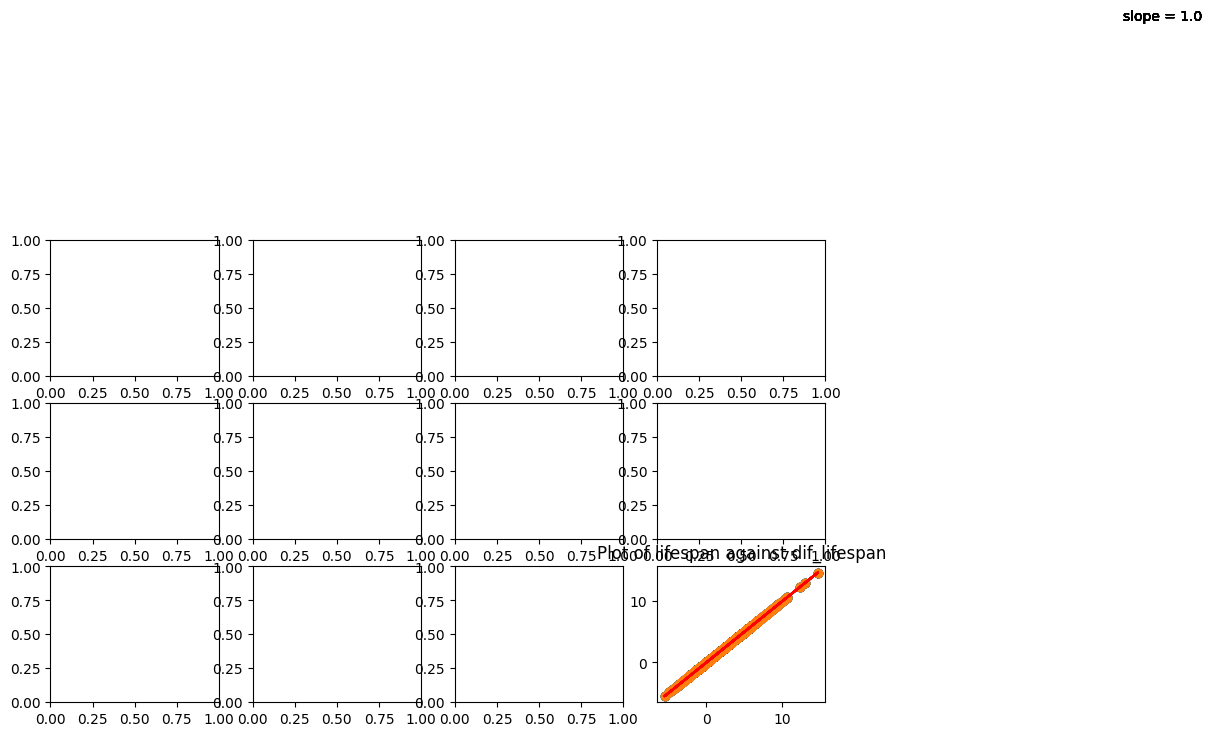

In [14]:
# THIS PART IS NOT FINISHED YET (AND NEVER WILL BE?)

# To increase readability of code, you can turn on/off running the script
run = False
if run or run_all:
    # Pairplots and regression
    cols = 4
    shape = (3, 4)
    display(df.iloc[:, :9])
    pairplot(shape, df.iloc[:, :9], df.columns[0])
    
    
    # # Plotting variables
    # depend_var = df.columns[0] # Lifespan is the dependent variable
    # for variable in df.columns[:9]:
    #     # Use numpy polyfit with 1 degree to quickly fit linear regressionline
    #     b1, b0 = np.polyfit(df[variable], df[depend_var], 1)
    #     # Define the Q-Q plot
    #     plt.text(55, 105, f"slope = {round(b1, 2)}", fontsize = 10)
    #     plt.scatter(df[variable], df[depend_var])
    #     plt.plot(df[variable], b0+b1*df[variable], color='red')
    #     plt.title(f"Plot of {variable} against {depend_var}")
    #     plt.show()

**Interpretation**<br>
The questions that were raised when looking at the histograms are also visible in the Q-Q plots. There seem to be some (arbitrary) cutoff points, which indicates that this dataset is sampled on a specific subgroup of the population. Without more information, I am not able to explicit what the specific subgroup is, however this 'bias' of the dataset will have an effect on the model. This bias should be mentioned to the enduser.

_**This workbook is not finished, however for the sake of time we continue to the next steps**_

### Next steps:
The next step is to put this code in a pipeline (only the parts where the dataset is modified) and to select one or different versions of the dataset to start modelling.
